<a href="https://colab.research.google.com/github/jaiderrestrepo20/Proyecto-IA/blob/main/02_preprocesado.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
# 02 - PREPROCESAMIENTO DE DATOS


# 1. Importación de librerías --
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, LabelEncoder

import gc

print("Librerías importadas correctamente. Se usarán para:")
print("  - pandas / numpy: manejo de datos")
print("  - matplotlib / seaborn: visualización")
print("  - sklearn: imputación, escalado y codificación")
print("  - gc: limpieza de memoria\n")


Librerías importadas correctamente. Se usarán para:
  - pandas / numpy: manejo de datos
  - matplotlib / seaborn: visualización
  - sklearn: imputación, escalado y codificación
  - gc: limpieza de memoria



In [5]:
#  2. Cargar los datos


print("Selecciona el archivo 'train.csv' desde tu equipo...")
from google.colab import files
uploaded = files.upload()

filename = list(uploaded.keys())[0]
df = pd.read_csv(filename)

print(f"\n Datos cargados correctamente: {df.shape[0]:,} filas y {df.shape[1]} columnas")
print("\n Vista previa de las primeras filas:")
display(df.head())

Selecciona el archivo 'train.csv' desde tu equipo...


Saving train.zip to train (1).zip

 Datos cargados correctamente: 20,216,100 filas y 4 columnas

 Vista previa de las primeras filas:


,building_id,meter,timestamp,meter_reading
0,0,0,2016-01-01 00:00:00,0.0
1,1,0,2016-01-01 00:00:00,0.0
2,2,0,2016-01-01 00:00:00,0.0
3,3,0,2016-01-01 00:00:00,0.0
4,4,0,2016-01-01 00:00:00,0.0


In [6]:
# 3. Información general del dataset


print("\n Información general:")
df.info()

print("\n Valores nulos por columna (solo las que tienen faltantes):")
print(df.isnull().sum()[df.isnull().sum() > 0])

print("\n Observa las columnas con más datos faltantes. Esto servirá para decidir si se imputan o eliminan.")


 Información general:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20216100 entries, 0 to 20216099
Data columns (total 4 columns):
 #   Column         Dtype  
---  ------         -----  
 0   building_id    int64  
 1   meter          int64  
 2   timestamp      object 
 3   meter_reading  float64
dtypes: float64(1), int64(2), object(1)
memory usage: 616.9+ MB

 Valores nulos por columna (solo las que tienen faltantes):
Series([], dtype: int64)

 Observa las columnas con más datos faltantes. Esto servirá para decidir si se imputan o eliminan.


In [7]:
#  4. Optimización de tipos de datos


print("\n Optimizando tipos de datos para reducir consumo de RAM...")

mem_before = df.memory_usage(deep=True).sum() / 1024**2

for col in df.select_dtypes(include=['int64']).columns:
    df[col] = df[col].astype('int32')
for col in df.select_dtypes(include=['float64']).columns:
    df[col] = df[col].astype('float32')
for col in df.select_dtypes(include=['object']).columns:
    df[col] = df[col].astype('category')

mem_after = df.memory_usage(deep=True).sum() / 1024**2
reduction = (mem_before - mem_after) / mem_before * 100

print(f" Memoria antes:  {mem_before:.2f} MB")
print(f" Memoria después: {mem_after:.2f} MB")
print(f" Reducción del uso de memoria: {reduction:.1f}%")


 Optimizando tipos de datos para reducir consumo de RAM...
 Memoria antes:  1773.72 MB
 Memoria después: 270.74 MB
 Reducción del uso de memoria: 84.7%


In [8]:
#  5. Identificar variables numéricas y categóricas


num_cols = df.select_dtypes(include=['int32', 'float32']).columns.tolist()
cat_cols = df.select_dtypes(include=['category']).columns.tolist()

print("\n Identificación de tipos de variables:")
print(f" Columnas numéricas ({len(num_cols)}): {num_cols[:5]}{'...' if len(num_cols)>5 else ''}")
print(f" Columnas categóricas ({len(cat_cols)}): {cat_cols[:5]}{'...' if len(cat_cols)>5 else ''}")
print(" Esto permite aplicar distintos tratamientos según el tipo de dato.\n")


 Identificación de tipos de variables:
 Columnas numéricas (3): ['building_id', 'meter', 'meter_reading']
 Columnas categóricas (1): ['timestamp']
 Esto permite aplicar distintos tratamientos según el tipo de dato.



In [9]:
#  6. Imputación de valores faltantes


print("Imputando valores faltantes...")

num_imputer = SimpleImputer(strategy='median')
cat_imputer = SimpleImputer(strategy='most_frequent')

df[num_cols] = num_imputer.fit_transform(df[num_cols])
df[cat_cols] = cat_imputer.fit_transform(df[cat_cols])

faltantes_restantes = df.isnull().sum().sum()
if faltantes_restantes == 0:
    print(" No quedan valores faltantes en el dataset.")
else:
    print(f"Aún quedan {faltantes_restantes} valores nulos sin imputar.")


Imputando valores faltantes...
 No quedan valores faltantes en el dataset.



 Detección de posibles valores atípicos (outliers)...


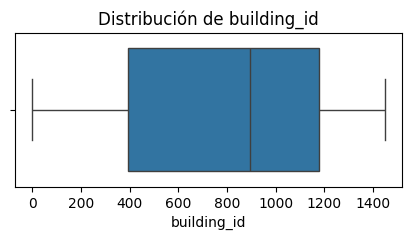

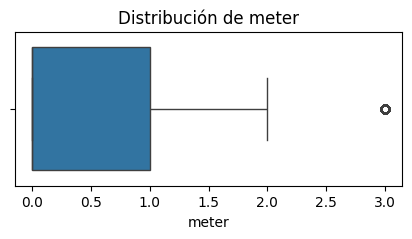

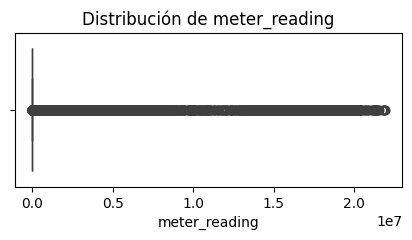

Revisa las variables con valores extremos. Pueden necesitar transformación o recorte (winsorización).



In [10]:
#  7. Detección de valores atípicos


print("\n Detección de posibles valores atípicos (outliers)...")

for col in num_cols[:3]:
    plt.figure(figsize=(5,2))
    sns.boxplot(x=df[col])
    plt.title(f"Distribución de {col}")
    plt.show()

print("Revisa las variables con valores extremos. Pueden necesitar transformación o recorte (winsorización).\n")

In [11]:
#  8. Codificación de variables categóricas


print("Codificando variables categóricas (Label Encoding)...")

label_encoders = {}
for col in cat_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

print("Variables categóricas convertidas a valores numéricos para su uso en modelos.")
print(f"Ejemplo (primeras 3 columnas categóricas codificadas): {cat_cols[:3]}\n")


Codificando variables categóricas (Label Encoding)...
Variables categóricas convertidas a valores numéricos para su uso en modelos.
Ejemplo (primeras 3 columnas categóricas codificadas): ['timestamp']



In [12]:
#  9. Escalado de variables numéricas


print("📏 Estandarizando variables numéricas (media=0, desviación=1)...")

scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])

print(" Escalado completado. Ahora todas las variables numéricas tienen la misma escala.")
print("Esto mejora el desempeño de modelos basados en distancia o gradiente.\n")

📏 Estandarizando variables numéricas (media=0, desviación=1)...
 Escalado completado. Ahora todas las variables numéricas tienen la misma escala.
Esto mejora el desempeño de modelos basados en distancia o gradiente.



In [13]:

# 10. Verificación y resumen final


print("Verificación final del DataFrame procesado:")
print(df.info())
print("\n Estadísticos generales después del preprocesamiento:")
display(df.describe().T.head(10))

print("\n RESUMEN FINAL:")
print(f" - Filas totales: {df.shape[0]}")
print(f" - Columnas totales: {df.shape[1]}")
print(f" - Variables numéricas escaladas: {len(num_cols)}")
print(f" - Variables categóricas codificadas: {len(cat_cols)}")
print(f" - Memoria utilizada: {df.memory_usage(deep=True).sum()/1024**2:.2f} MB")

print("\n Dataset listo para análisis exploratorio, selección de características o modelado predictivo.")

gc.collect()

Verificación final del DataFrame procesado:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20216100 entries, 0 to 20216099
Data columns (total 4 columns):
 #   Column         Dtype  
---  ------         -----  
 0   building_id    float64
 1   meter          float64
 2   timestamp      int64  
 3   meter_reading  float64
dtypes: float64(3), int64(1)
memory usage: 616.9 MB
None

 Estadísticos generales después del preprocesamiento:


,count,mean,std,min,25%,50%,75%,max
building_id,20216100.0,-8.199178e-18,1.000000,-1.872226,-0.951664,0.224219,0.889459,1.519564
meter,20216100.0,-1.183145e-16,1.000000,-0.711543,-0.711543,-0.711543,0.362580,2.510826
timestamp,20216100.0,4.438995e+03,2526.325363,0.000000,2301.000000,4457.000000,6622.000000,8783.000000
meter_reading,20216100.0,1.955881e-17,1.000000,-0.013816,-0.013697,-0.013302,-0.012067,142.934017



 RESUMEN FINAL:
 - Filas totales: 20216100
 - Columnas totales: 4
 - Variables numéricas escaladas: 3
 - Variables categóricas codificadas: 1
 - Memoria utilizada: 616.95 MB

 Dataset listo para análisis exploratorio, selección de características o modelado predictivo.


3160